<a href="https://colab.research.google.com/github/Vieiraligia/Imersao_Python_Alura/blob/main/Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
new_columns = {
    'work_year': 'ano_trabalho',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'USD',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'porte_empresa'
}
df.rename(columns=new_columns, inplace=True)
print("As colunas do DataFrame foram traduzidas:")
print(df.columns)

As colunas do DataFrame foram traduzidas:
Index(['ano_trabalho', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda',
       'USD', 'residencia', 'remoto', 'localizacao_empresa', 'porte_empresa'],
      dtype='object')


In [7]:
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
})
print(df['contrato'].value_counts())

contrato
Tempo Integral    132563
Contrato             394
Meio Período         376
Freelancer            16
Name: count, dtype: int64


In [8]:
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Sênior',
    'MI': 'Médio',
    'EN': 'Iniciante',
    'EX': 'Executivo'
})
print(df['senioridade'].value_counts())

senioridade
Sênior       77241
Médio        40465
Iniciante    12443
Executivo     3200
Name: count, dtype: int64


In [9]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,localizacao_empresa,porte_empresa
count,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,US,M
freq,77241,132563,17314,126140,119579,119641,129561


In [10]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salario': [4000,np.nan, 5000, np.nan, 100000]

})
#calcula a média salarial e substitui os nulos pela média e arredonda
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))


'''Calcula a mediana salarial e substitui os nulos pela mediana'''
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [11]:
df_temperaturas = pd.DataFrame({
'dia': ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
'Temperatura': [30, np.nan, np.nan, 28, 27]
})
df_temperaturas["preenchido_ffill"] = df_temperaturas ["Temperatura"].ffill()
df_temperaturas

,dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [12]:
df_temperaturas = pd.DataFrame({
'dia': ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
'Temperatura': [30, np.nan, np.nan, 28, 27]
})
df_temperaturas["preenchido_bfill"] = df_temperaturas ["Temperatura"].bfill()
df_temperaturas

,dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [13]:
df_cidades = pd.DataFrame({
   'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'cidade' : ["Sao Paulo", np.nan, "Curitiba", np.nan, "Belem"]
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna("Não informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,Sao Paulo,Sao Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belem,Belem


In [14]:
df_limpo = df.dropna()

In [15]:
df_limpo.isnull().sum()

,0
ano_trabalho,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
USD,0
residencia,0
remoto,0
localizacao_empresa,0


In [16]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano_trabalho         133339 non-null  float64
 1   senioridade          133339 non-null  object 
 2   contrato             133339 non-null  object 
 3   cargo                133339 non-null  object 
 4   salario              133339 non-null  int64  
 5   moeda                133339 non-null  object 
 6   USD                  133339 non-null  int64  
 7   residencia           133339 non-null  object 
 8   remoto               133339 non-null  int64  
 9   localizacao_empresa  133339 non-null  object 
 10  porte_empresa        133339 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


In [17]:
df_limpo = df_limpo.assign(ano_trabalho = df_limpo['ano_trabalho'].astype('int64'))
df_limpo

,ano_trabalho,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_empresa,porte_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,Médio,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,Médio,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Sênior,Tempo Integral,Data Scientist,412000,USD,412000,US,100,US,L
133345,2021,Médio,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,100,US,L
133346,2020,Iniciante,Tempo Integral,Data Scientist,105000,USD,105000,US,100,US,S
133347,2020,Iniciante,Contrato,Business Data Analyst,100000,USD,100000,US,100,US,L


In [18]:
df_limpo.head()

,ano_trabalho,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_empresa,porte_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,Médio,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,Médio,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

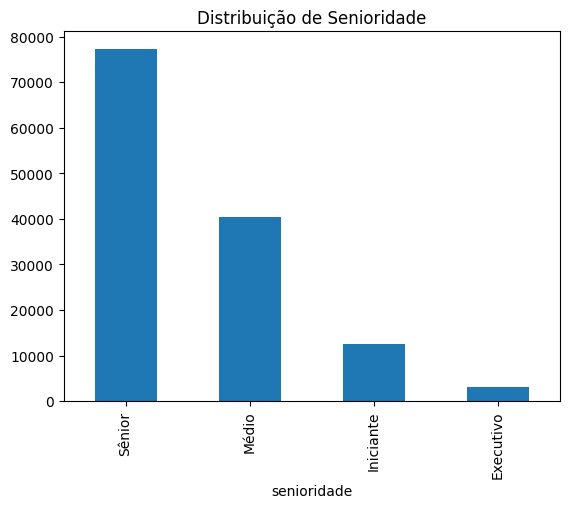

In [21]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title= 'Distribuição de Senioridade')

In [22]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='USD'>

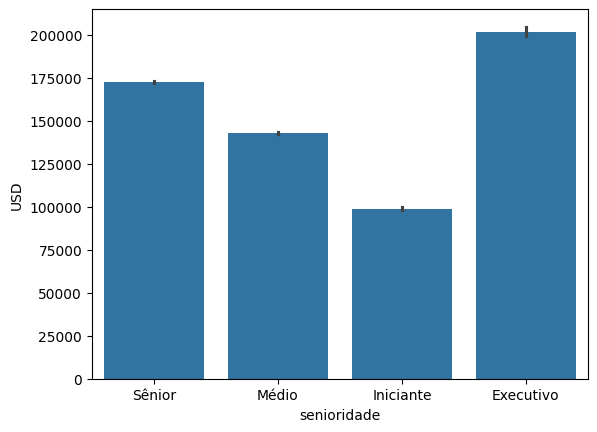

In [23]:
sns.barplot(data=df_limpo, x='senioridade', y='USD')



In [24]:
import matplotlib.pyplot as plt


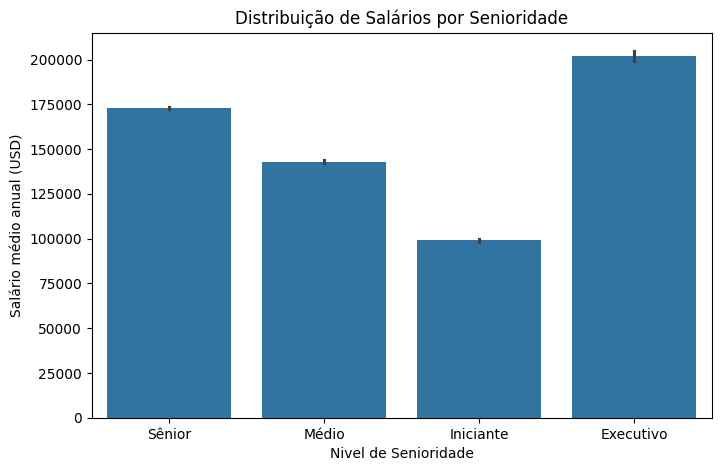

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='USD')
plt.title('Distribuição de Salários por Senioridade')
plt.xlabel('Nivel de Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [27]:
df_limpo.groupby('senioridade')['USD'].mean().sort_values(ascending=False)

,USD
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Médio,143044.845979
Iniciante,99034.963267


In [29]:
ordem = df_limpo.groupby('senioridade')['USD'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Sênior', 'Médio', 'Iniciante'], dtype='object', name='senioridade')

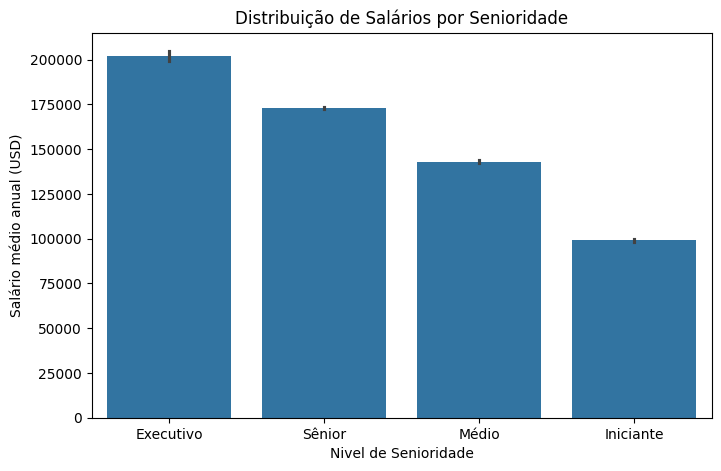

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='USD', order=ordem)
plt.title('Distribuição de Salários por Senioridade')
plt.xlabel('Nivel de Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

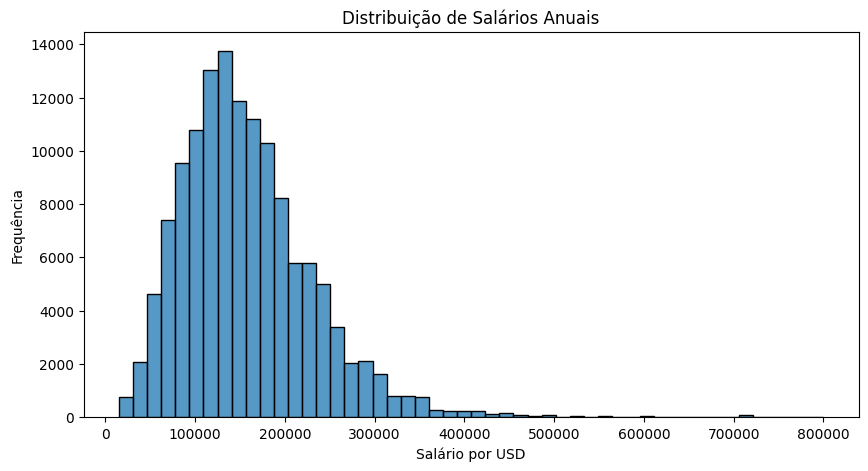

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['USD'], bins=50, kde=False)
plt.title('Distribuição de Salários Anuais')
plt.xlabel('Salário por USD')
plt.ylabel('Frequência')
plt.show()

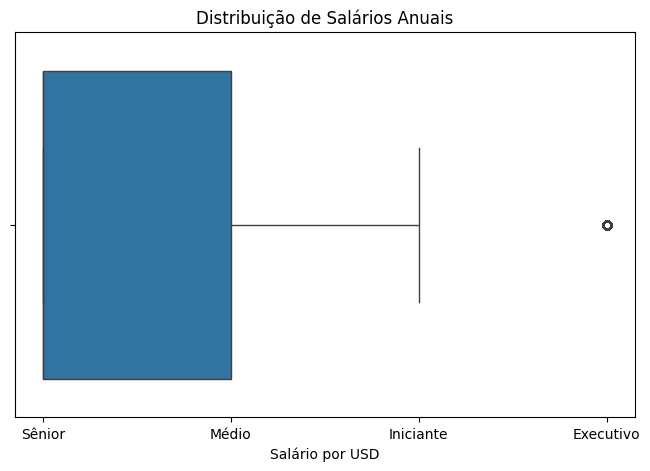

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='senioridade')
plt.title('Distribuição de Salários Anuais')
plt.xlabel('Salário por USD')
plt.show()

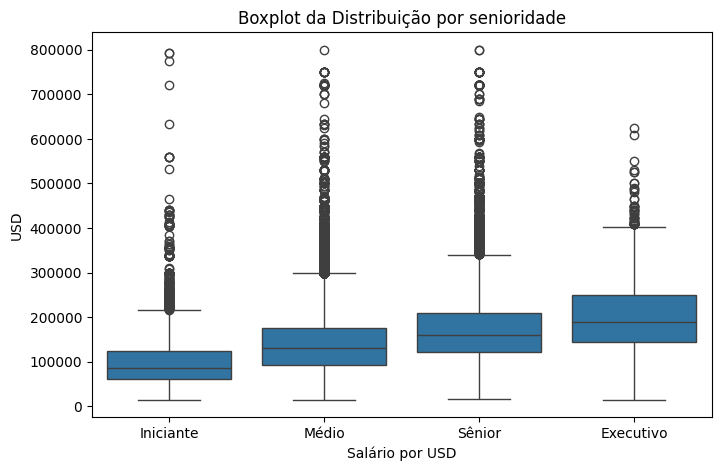

In [52]:
ordem_senioridade = ['Iniciante', 'Médio', 'Sênior','Executivo']
plt.figure(figsize=(8,5))
sns.boxplot( x='senioridade', y= 'USD', data=df_limpo, order=ordem_senioridade)
plt.title('Boxplot da Distribuição por senioridade')
plt.xlabel('Salário por USD')
plt.show()

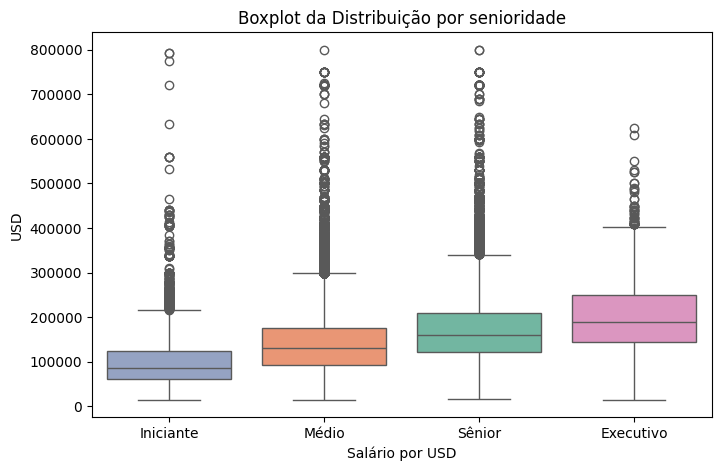

In [53]:
ordem_senioridade = ['Iniciante', 'Médio', 'Sênior','Executivo']
plt.figure(figsize=(8,5))
sns.boxplot( x='senioridade', y= 'USD', data=df_limpo, order=ordem_senioridade, palette='Set2',hue='senioridade')
plt.title('Boxplot da Distribuição por senioridade')
plt.xlabel('Salário por USD')
plt.show()

In [54]:
import plotly.express as px

In [55]:
df_avg_salario_senioridade = df_limpo.groupby('senioridade')['USD'].mean().reset_index()
fig = px.bar(df_avg_salario_senioridade, x='senioridade', y='USD',
             title='Média Salarial por Nível de Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'USD': 'Média Salarial Anual (USD)'},
             category_orders={'senioridade': ordem})
fig.show()

In [63]:
remoto_contagem= df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns= ['tipo_trabalho', 'quantidade']


fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values ='quantidade',
             title='Proporção do Tipo de Trabalho')

fig.show()

In [56]:
df_limpo.head()

,ano_trabalho,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,localizacao_empresa,porte_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,Médio,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,Médio,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,Iniciante,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,M


In [65]:
remoto_contagem= df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns= ['tipo_trabalho', 'quantidade']


fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values ='quantidade',
             title='Proporção do Tipo de Trabalho',
             hole=0.5)

fig.show()

In [66]:
remoto_contagem= df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns= ['tipo_trabalho', 'quantidade']


fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values ='quantidade',
             title='Proporção do Tipo de Trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()